In [43]:
# import
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

from matplotlib import pyplot as plt

In [45]:
%matplotlib inline

### Loading the data

In [91]:
(train_image, train_labels),(test_image, test_labels) = mnist.load_data()

In [92]:
train_image.shape  # 3-D Matrices

(60000, 28, 28)

In [93]:
len(train_image)  # total count of input img 

60000

In [94]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### The Network

In [74]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28,28)))
net.add(layers.Dense(10, activation='softmax'))

In [75]:
# compilation
net.compile(optimizer='rmsprop',
           loss='categorical_crossentropy',
                      metrics=['accuracy'])

### Preparing the input data   


In [95]:
train_image[0].shape  # 1 image size

(28, 28)

In [100]:
# reshaping it 
#train_image = train_image.reshape((60000, 28*28))
train_img = train_image.reshape((60000, -1))
# scaling the value of pixels in the 0,1 range by dividing 255
train_img = train_image.astype('float32')/255

In [101]:
print(train_image.shape)
print(train_img.shape)

(60000, 28, 28)
(60000, 28, 28)


In [85]:
train_img[0].shape

(28, 28)

**Preparing the same for test data**

In [58]:
# reshaping it 
test_img = test_image.reshape((10000, 28*28))
# scaling the value of pixels in the 0,1 range by dividing 255
test_img = test_image.astype('float32')/255

### Encoding the labels as Categorical

In [39]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [59]:
train_labels[0].dtype

dtype('uint8')

In [60]:
train_labels[0]

5

### Training the Network 

In [61]:
net.fit(train_img, train_labels, batch_size=128, epochs=5)

ValueError: Error when checking target: expected dense_8 to have 3 dimensions, but got array with shape (60000, 1)

### Display the data

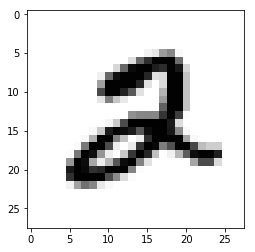

In [103]:
digit = train_img[5]
plt.imshow(digit, cmap=plt.cm.binary)

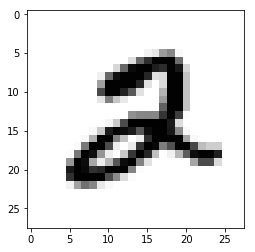

In [104]:
plt.imshow(train_image[5], cmap=plt.cm.binary)

In [69]:
import numpy
a = numpy.array([0,2,1,2,3,4])
print(a, a.shape)
b = a.reshape((2,3))
print(b, b.shape)

[0 2 1 2 3 4] (6,)
[[0 2 1]
 [2 3 4]] (2, 3)


In [ ]:
a